In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")
df = df.sort_values(by='week')

In [3]:
df = df[df['zeme_puvodu'] == 'Česko']

## Nejvíce jednotlivých umístění v top x (i víckrát v 1 týdnu)

In [4]:
df[df['pozice'] <= 100].groupby('interpret_hlavni').size().nlargest(10)

interpret_hlavni
Kryštof           1458
Chinaski          1267
Mirai             1180
Marek Ztracený    1005
Xindl X            877
Slza               755
Mandrage           731
Michal Hrůza       668
No Name            497
Divokej Bill       491
dtype: int64

In [5]:
df[df['pozice'] <= 10].groupby('interpret_hlavni').size().nlargest(10)

interpret_hlavni
Chinaski          346
Kryštof           320
Mirai             213
Xindl X           144
Marek Ztracený    131
Jelen              93
Mandrage           66
O5                 46
Slza               46
Michal Hrůza       43
dtype: int64

In [6]:
df[df['pozice'] <= 1].groupby('interpret_hlavni').size().nlargest(10)

interpret_hlavni
Kryštof              56
Chinaski             39
Mirai                30
Xindl X              23
Mandrage             12
Peter Bič Project     8
Ready Kirken          8
Support Lesbiens      8
Lenny                 4
Verona                4
dtype: int64

## Vizualizace dominance interpretů

In [7]:
vsechnytydny = [x for x in df['week'].drop_duplicates().to_list() if len(str(x)) == 7]

In [8]:
vsechnytydny

['2006-01',
 '2006-02',
 '2006-03',
 '2006-04',
 '2006-05',
 '2006-06',
 '2006-07',
 '2006-08',
 '2006-09',
 '2006-10',
 '2006-11',
 '2006-12',
 '2006-13',
 '2006-14',
 '2006-15',
 '2006-16',
 '2006-17',
 '2006-18',
 '2006-19',
 '2006-20',
 '2006-21',
 '2006-22',
 '2006-23',
 '2006-24',
 '2006-25',
 '2006-26',
 '2006-27',
 '2006-28',
 '2006-29',
 '2006-30',
 '2006-31',
 '2006-32',
 '2006-33',
 '2006-34',
 '2006-35',
 '2006-36',
 '2006-37',
 '2006-38',
 '2006-39',
 '2006-40',
 '2006-41',
 '2006-42',
 '2006-43',
 '2006-44',
 '2006-45',
 '2006-46',
 '2006-47',
 '2006-48',
 '2006-49',
 '2006-50',
 '2006-52',
 '2007-01',
 '2007-02',
 '2007-03',
 '2007-04',
 '2007-05',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2007-13',
 '2007-14',
 '2007-15',
 '2007-16',
 '2007-17',
 '2007-18',
 '2007-19',
 '2007-20',
 '2007-21',
 '2007-22',
 '2007-23',
 '2007-24',
 '2007-25',
 '2007-26',
 '2007-27',
 '2007-28',
 '2007-29',
 '2007-30',
 '2007-31',
 '2007-32',
 '20

In [9]:
def nejvyssi_pozice_interpreta(x):
    pracovni = df[df['interpret_hlavni'] == x].groupby('week')['pozice'].min()
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni.plot(figsize=(20,5)).invert_yaxis()

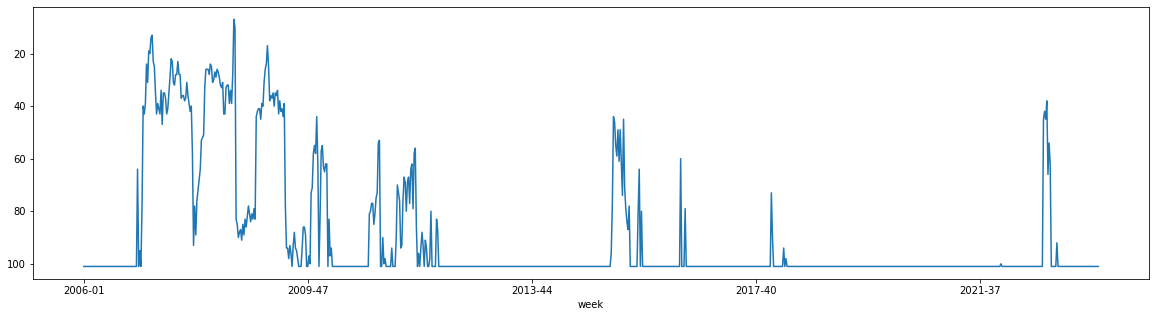

In [10]:
nejvyssi_pozice_interpreta('Kabát')

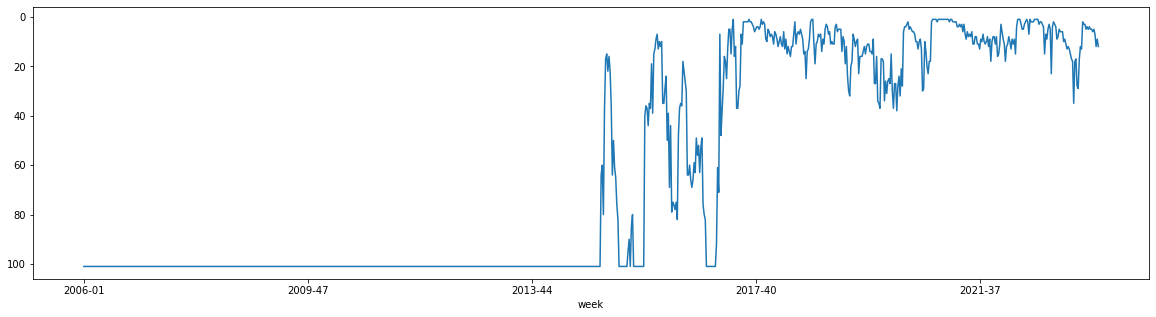

In [11]:
nejvyssi_pozice_interpreta('Mirai')

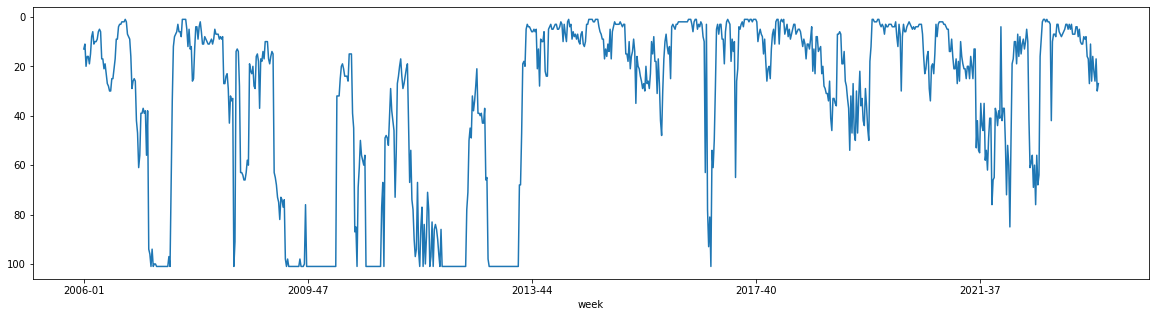

In [12]:
nejvyssi_pozice_interpreta('Chinaski')

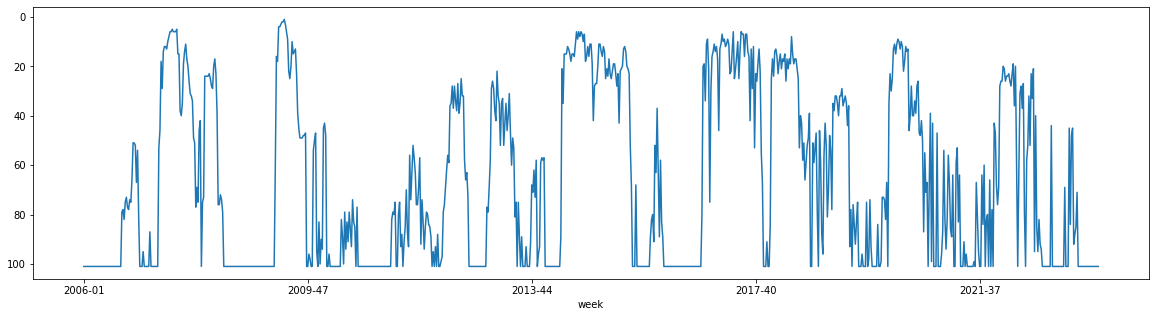

In [13]:
nejvyssi_pozice_interpreta('Michal Hrůza')

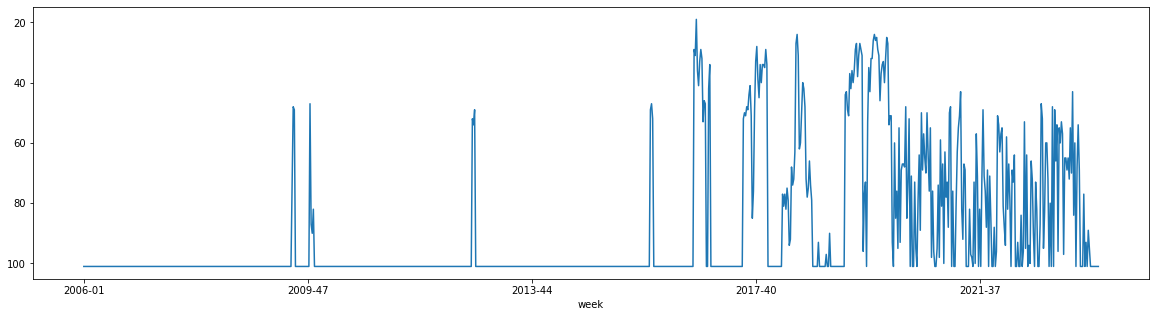

In [14]:
nejvyssi_pozice_interpreta('Karel Gott')

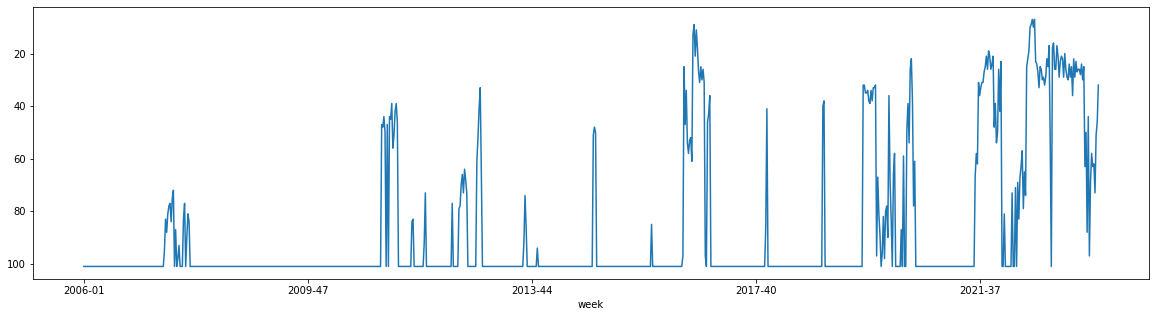

In [15]:
nejvyssi_pozice_interpreta('Lucie Bílá')

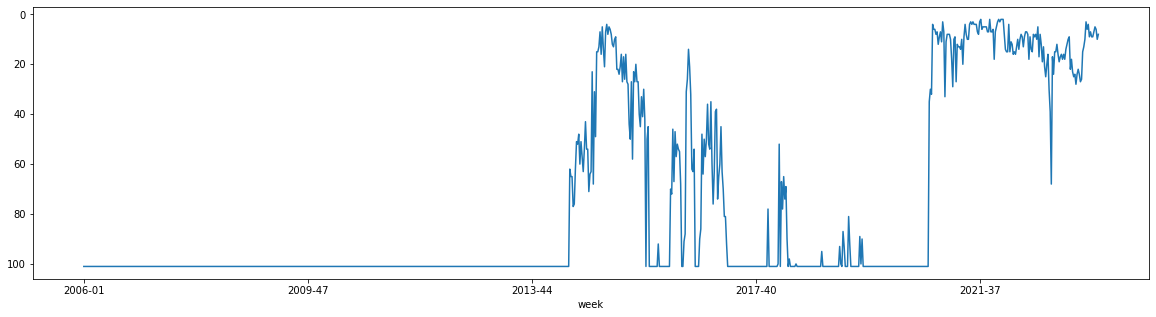

In [16]:
nejvyssi_pozice_interpreta('Jelen')

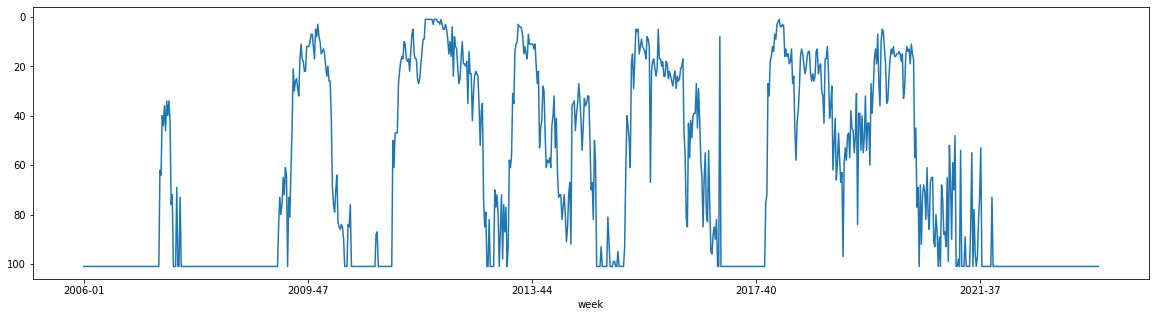

In [17]:
nejvyssi_pozice_interpreta('Mandrage')

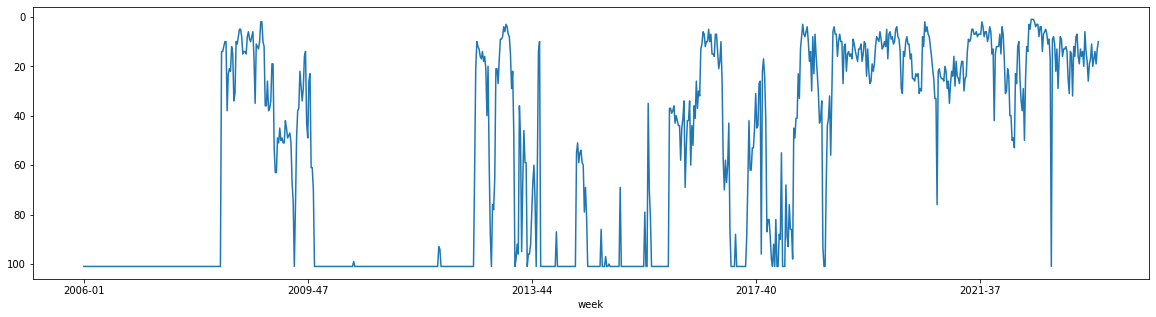

In [18]:
nejvyssi_pozice_interpreta('Marek Ztracený')

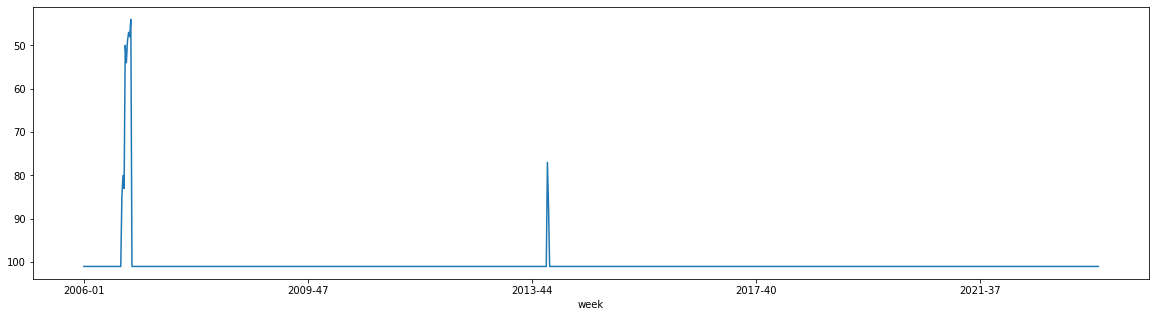

In [33]:
nejvyssi_pozice_interpreta('Wohnout')

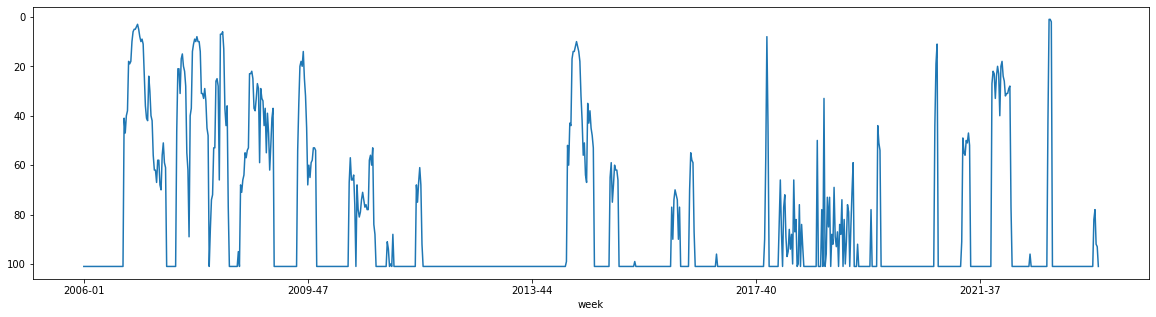

In [19]:
nejvyssi_pozice_interpreta('Ewa Farna')

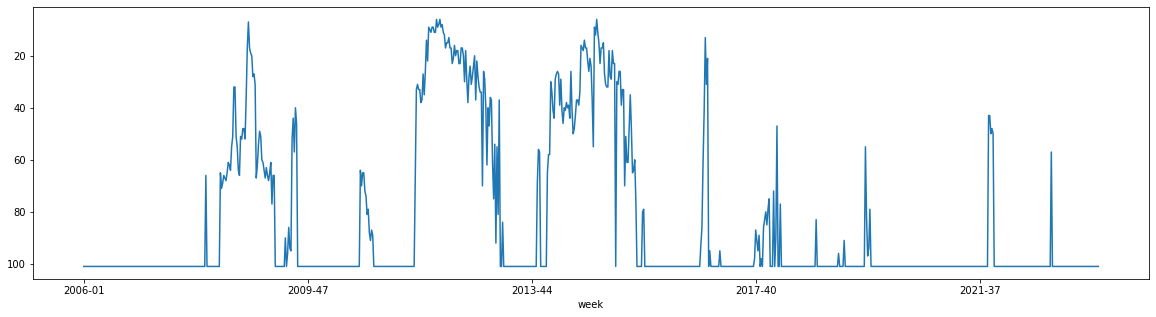

In [20]:
nejvyssi_pozice_interpreta('Tomáš Klus')

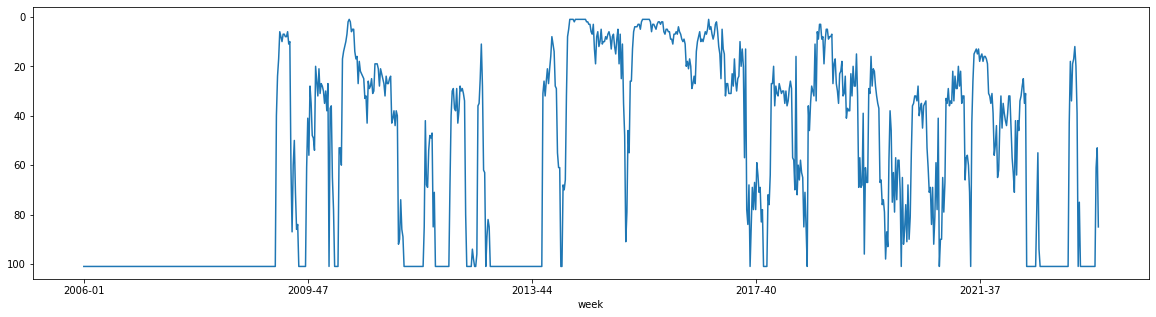

In [21]:
nejvyssi_pozice_interpreta('Xindl X')

## Další ukazatele popularity

## Kdy naposledy nebyli v top 100?

In [22]:
def kdynaposledne(x):
    pracovni = df[df['interpret_hlavni'] == x].groupby('week')['pozice'].min()
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni[pracovni > 100].tail(1).index[0]

In [23]:
dominatori = df.groupby('interpret_hlavni').size().nlargest(100).index.to_list()

In [24]:
doms = {}
for x in dominatori:
    doms[x] = kdynaposledne(x)

In [25]:
pd.Series(doms).sort_values().head(10)

Chinaski          2016-52
Mirai             2017-04
Kryštof           2017-21
Jelen             2020-43
O5                2021-07
Slza              2021-50
Marek Ztracený    2022-52
Lucie Bílá        2022-52
Divokej Bill      2023-17
Anna K.           2023-33
dtype: object

### Nejvíce tracků v top 100

In [26]:
df.groupby('interpret_hlavni')['track'].nunique().nlargest(20)

interpret_hlavni
Kryštof              31
Chinaski             29
Xindl X              28
Marek Ztracený       25
Michal Hrůza         25
Support Lesbiens     25
Ewa Farna            22
Mirai                19
Verona               19
Lucie Vondráčková    18
No Name              18
David Deyl           17
Eddie Stoilow        17
Mandrage             17
Divokej Bill         16
Lucie Bílá           16
Slza                 16
Anna K.              15
Lenny                15
Tomáš Klus           15
Name: track, dtype: int64

### Nejvíce hitů č. 1

In [27]:
df[df['pozice'] == 1].groupby('interpret_hlavni')['track'].nunique().nlargest(50)

interpret_hlavni
Chinaski             10
Kryštof              10
Mirai                 4
Xindl X               4
Lenny                 2
Mandrage              2
Verona                2
Helena Zeťová         1
Lucie                 1
Marek Ztracený        1
Michal Hrůza          1
Divokej Bill          1
Ewa Farna             1
Nightwork             1
Peter Bič Project     1
Ready Kirken          1
Support Lesbiens      1
Václav Neckář         1
Wanastowi Vjecy       1
Mikolas Josef         1
Name: track, dtype: int64

In [28]:
df.groupby('interpret_hlavni')['rok'].nunique().nlargest(10)

interpret_hlavni
Chinaski            18
Kryštof             18
Michal Hrůza        18
Ewa Farna           16
No Name             16
Support Lesbiens    16
Verona              16
Anna K.             15
Marek Ztracený      15
Xindl X             15
Name: rok, dtype: int64

In [29]:
df.groupby('interpret_hlavni').size().nlargest(10)

interpret_hlavni
Kryštof           1458
Chinaski          1267
Mirai             1180
Marek Ztracený    1005
Xindl X            877
Slza               755
Mandrage           731
Michal Hrůza       668
No Name            497
Divokej Bill       491
dtype: int64

## Královny české popmusic lol

In [30]:
df[df['gender'] == 'žena'].groupby('interpret_hlavni').size().nlargest(10)

interpret_hlavni
Anna K.              399
Lenny                322
Ewa Farna            315
Lucie Vondráčková    255
Lucie Bílá           230
Aneta Langerová      211
Olga Lounová         206
Tereza Kerndlová     140
Helena Zeťová        110
Lenka Filipová       104
dtype: int64

In [31]:
df[(df['gender'] == 'žena') & (df['pozice'] <= 20)].groupby('interpret_hlavni')['track'].nunique().nlargest(15)

interpret_hlavni
Anna K.              9
Ewa Farna            8
Lenny                8
Emma Smetana         4
Annabelle            3
Olga Lounová         3
Helena Zeťová        2
Lucie Bílá           2
Tereza Kerndlová     2
Barbora Poláková     1
Lenka Filipová       1
Lucie Vondráčková    1
Name: track, dtype: int64

In [32]:
df.explode('zanry').groupby('zanry')['interpret_hlavni'].nunique().nlargest(20)

zanry
pop music            36
rock                 25
folk                 10
pop rock             10
hip hop               8
jazz                  7
alternativní rock     6
punk rock             5
rap                   5
lidová hudba          4
country               3
hard rock             3
heavy metal           3
indie rock            3
populární hudba       3
synthpop              3
trap                  3
folk pop              2
folk rock             2
house music           2
Name: interpret_hlavni, dtype: int64